In [2]:
import os
import cv2
from tqdm import tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from skimage.measure import label, regionprops
# from skimage.util.montage import montage2d as montage
from glob import glob

In [3]:
img_dir='c://kaggle//'

train_image_dir=os.path.join(img_dir,'images')

train_mask_dir=os.path.join(img_dir,'masks')

train_imgs=glob(train_image_dir+'//*.png')

train_masks=glob(train_mask_dir+'//*.png')

pic_height,pic_width=101,101




c://kaggle//images\029c321179.png
('Found bbox', (23L, 0L, 101L, 27L))


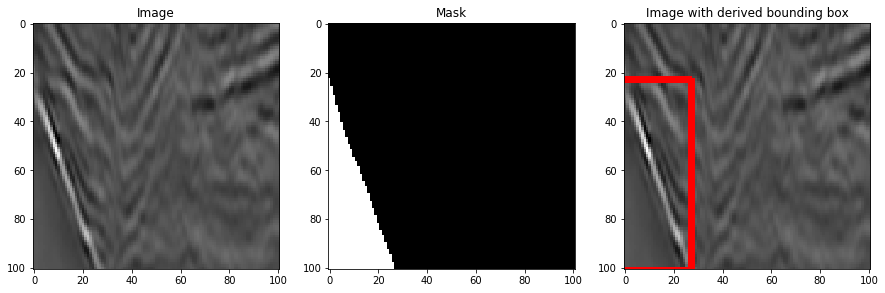

In [8]:
random_index=32

print (train_imgs[random_index])
for i in range(1):
#     image = images_with_ship[i]

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
#     img_0 = cv2.imread(train_image_dir+'//' + image)
#     rle_0 = masks.query('ImageId=="'+image+'"')['EncodedPixels']
#     mask_0 = masks_as_image(rle_0)

    img_0=cv2.imread(train_imgs[random_index])
    mask_0=cv2.imread(train_masks[random_index])
    
#     ax1.imshow(img_0)
#     ax2.imshow(mask_0)
#     plt.show()
    
    
    
    
    lbl_0 = label(mask_0[...,0]) 
    props = regionprops(lbl_0)
    img_1 = img_0.copy()
    for prop in props:
        print('Found bbox', prop.bbox)
        cv2.rectangle(img_1, (prop.bbox[1]-5, prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 2)


    ax1.imshow(img_0)
    ax1.set_title('Image')
    ax2.set_title('Mask')
    ax3.set_title('Image with derived bounding box')
    ax2.imshow(mask_0[...,0], cmap='gray')
    ax3.imshow(img_1)
    plt.show()

((2L, 101L, 101L, 1L), (2L, 101L, 101L, 1L))


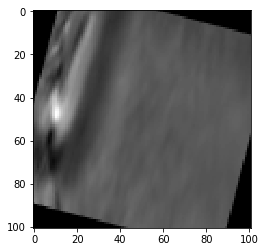

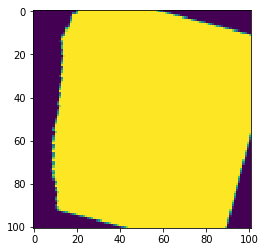

In [5]:
from imgaug import augmenters as iaa

from imgaug import augmenters as iaa

def augmentNumpy(imgs, lbls):
    augmenters_imgs = [
    iaa.Affine(        
        rotate=(-55, 35)
    )]                           
    seq_imgs = iaa.Sequential(augmenters_imgs, random_order=False)        
    seq_imgs_deterministic = seq_imgs.to_deterministic()
    
#     imgs_aug = seq_imgs_deterministic.augment_images(imgs),
    masks_aug = seq_imgs_deterministic.augment_images(lbls)
    imgs_aug = seq_imgs_deterministic.augment_images(imgs)

    return np.array(imgs_aug), np.array(masks_aug)


img_0=cv2.imread(train_imgs[16])
mask_0=cv2.imread(train_masks[16])
# print (img_0.shape,mask_0.shape)

img_series=np.empty((2,101,101,1))
mask_series=np.empty((2,101,101,1))

for i in range(2):
    img_series[i,:,:,0]=img_0[:,:,0]
    mask_series[i,:,:,0]=mask_0[:,:,0]
# print (img_series.shape)
    

imgs_aug, masks_aug=augmentNumpy(img_series,mask_series)

print (imgs_aug.shape,masks_aug.shape)
plt.imshow(imgs_aug[0,:,:,0],cmap=plt.cm.gray)
plt.show()

plt.imshow(masks_aug[0,:,:,0])
plt.show()

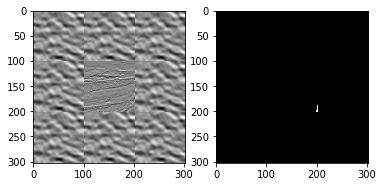

In [6]:
img_black=cv2.imread(train_imgs[0])
mask_black=cv2.imread(train_masks[0])


img_0=cv2.imread(train_imgs[8])
mask_0=cv2.imread(train_masks[8])

# img=np.vstack([img_black,img_0])


img_black_h=np.hstack([img_black,img_black,img_black])
img_h=np.hstack([img_black,img_0,img_black])


mask_black_h=np.hstack([mask_black,mask_black,mask_black])
mask_h=np.hstack([mask_black,mask_0,mask_black])


img_merge=np.vstack([img_black_h,img_h,img_black_h])
mask_merge=np.vstack([mask_black_h,mask_h,mask_black_h])

fig_1,(ax_1,ax_2)=plt.subplots(1,2)
ax_1.imshow(img_merge)
ax_2.imshow(mask_merge)
# plt.imshow(mask_merge)
plt.show()

('Found bbox', (189L, 199L, 202L, 202L))


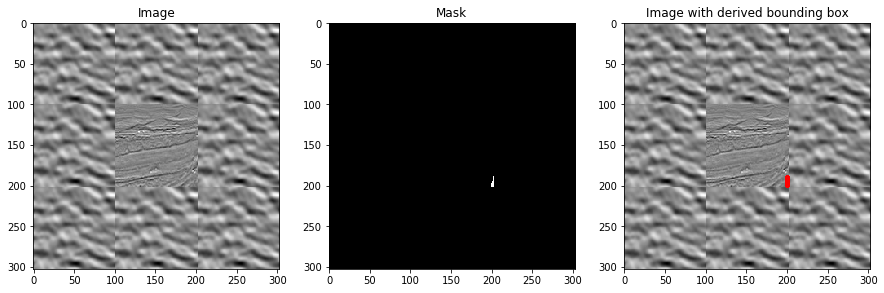

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
lbl_0 = label(mask_merge[...,0]) 
props = regionprops(lbl_0)
img_1 = img_merge.copy()
for prop in props:
    print('Found bbox', prop.bbox)
    cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 2)


ax1.imshow(img_merge)
ax1.set_title('Image')
ax2.set_title('Mask')
ax3.set_title('Image with derived bounding box')
ax2.imshow(mask_merge[...,0], cmap='gray')
ax3.imshow(img_1)
plt.show()